In [1]:
!pip install control

     |████████████████████████████████| 256kB 2.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=81bd422d3aa35ac1ff6a9796423bb7e0336ed4764c0a718e9964cdb6c4f6bd86
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [0]:

import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sympy import *
from matplotlib import animation
from control import *

%matplotlib inline
#comment out for light mode
plt.style.use('dark_background')

try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

# Boost converter
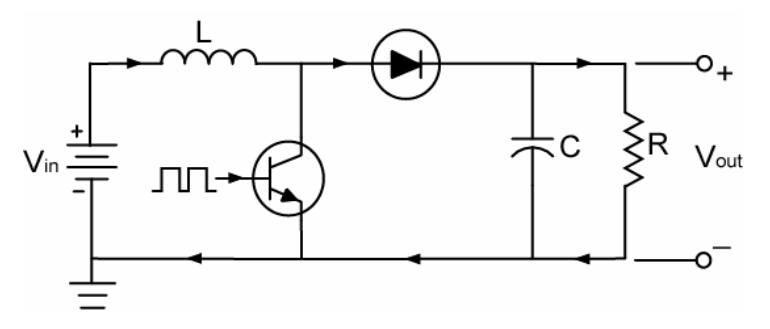

Has linear model

$$
\dot x = \begin{pmatrix}
-\frac{R_L}{L} & -\frac{1-d}{L}\\
\frac{1-d}{C} & -\frac{1}{RC}
\end{pmatrix}x + \begin{pmatrix}
-\frac{V_{ss}-V_d}{L} \\
-\frac{I_{ss}}{C}  
\end{pmatrix} u
$$
$$y =  \begin{pmatrix}
0 &1  
\end{pmatrix}x
$$
$u$ is the percent duty cycle

Substituting constants L=9.375e-4H, C=1.172e-4F, R=3.2Ω, Vd=0.8V, Rd=0.22Ω, Vin=250V, Vref=450V and computing $G(s) = C(sI-A)^{-1}B$ we get



In [8]:
G = tf([582.0/2009.0,-582],[2.715e-7,7.37e-4,1])
print(G)


        0.2897 s - 582
------------------------------
2.715e-07 s^2 + 0.000737 s + 1



In [44]:
r,k=root_locus(G,Plot=False);
print("Poles: " +str(r[0]))

Poles: [-1357.27440147-1356.8520374j -1357.27440147+1356.8520374j]


## Remark:
This system has poles at $-1357 \pm 1356j$.  Very large numbers relative to what we've seen in class.  

This system is involves the state of electronics, which are realativly fast so we'd expect large numbers for poles.

As a reminder roots of systems like $$\frac{1}{s+a}$$ have dynamics like
$$e^{-at}$$
and systems like 
$$\frac{1}{(s+j\omega)(s-j\omega)}$$
have dynamics like
$$sin(t\omega)$$

So we'd expect electronic systems with dynamics in the ms/us/ns to have large poles with potentially large imaginary parts and physical systems like cars with dynamics in the seconds to have smaller real and imaginary parts to their poles.



# Openloop step response

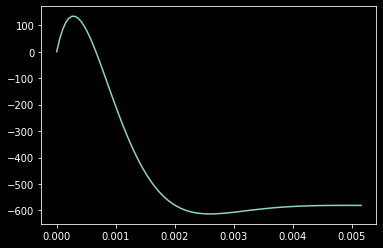

In [0]:
x,y = step_response(G);
plt.plot(x,y)

## Root locus
Open loop root locus

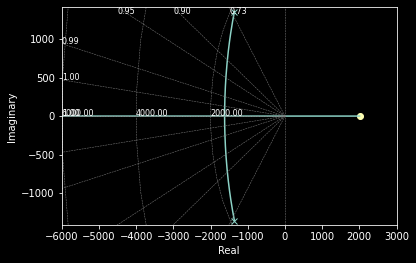

In [48]:
r,k=root_locus(G,xlim=(-6000,3000));

## Root locus

Looking at the root locus we have a non-minimum phase zero so there's not a lot we can do to improve the system with root locus.  However it is currently a type-0 system and therefor cannot track our desired output voltage.  We can at least pick a PI controller and verify we still have stability.


s - 300
-------
   s

0.0006131065752767827


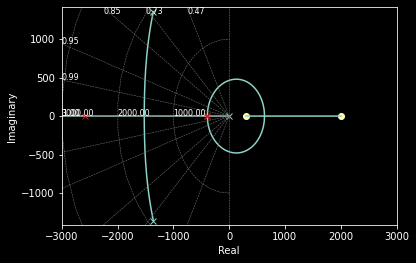

In [38]:
Gc = tf([1 ,-300 ],[1,0]) # a PI controller, add a zero.
print(Gc)
r,k = root_locus(series(Gc,G),xlim=(-3000,3000));

ind = 45
print(k[ind])
plt.plot(np.real(r[ind]),np.imag(r[ind]),'xr')
 

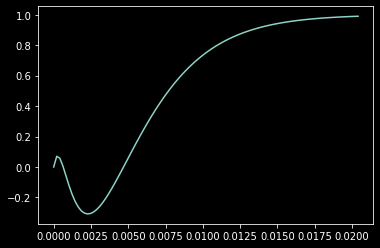

In [41]:
x,y = step_response(feedback( series(tf([0.00061],[1]),Gc,G)));
plt.plot(x,y)